<a href="https://colab.research.google.com/github/prashantmanghnani/AmazonEDA/blob/main/AmazonDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Myanmar  Amazon  Data  Analysis [Q1]

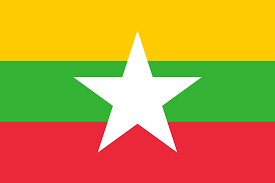


## Aim of this project is to gain insight into the sales data of Amazon to understand the different factors that affect sales of the different branches. [DESCRIPTIVE ANALYSIS]

In [ ]:
import pandas as pd
import numpy as np
import pymysql
import warnings
warnings.filterwarnings("ignore")

In [ ]:
connection=pymysql.connect(host="localhost",user="root",password="1054",database="amazonca")

In [ ]:
query_total_records = "SELECT COUNT(*) AS total_records FROM amazon;"
total_records = pd.read_sql(query_total_records, connection)
print("Total Records:")
print(total_records)

Total Records:
   total_records
0           1000


In [ ]:
query_total_columns =  """
SELECT COUNT(*) as total
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'amazon' AND TABLE_SCHEMA = 'amazonca';
"""
total_columns = pd.read_sql(query_total_columns, connection)
print(total_columns)

   total
0     17


#### The shape of the data hence is : 1000 X 17

In [ ]:
query_column_info = """
SELECT COLUMN_NAME, DATA_TYPE, IS_NULLABLE, COLUMN_DEFAULT
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'amazon' AND TABLE_SCHEMA = 'amazonca';
"""

column_info = pd.read_sql(query_column_info, connection)

# Display the column information
print("Column Information for 'amazon' Table in 'amazonca' Database:")
print(column_info)

Column Information for 'amazon' Table in 'amazonca' Database:
                COLUMN_NAME DATA_TYPE IS_NULLABLE COLUMN_DEFAULT
0                Invoice ID      text         YES           None
1                    Branch      text         YES           None
2                      City      text         YES           None
3             Customer type      text         YES           None
4                    Gender      text         YES           None
5              Product line      text         YES           None
6                Unit price    double         YES           None
7                  Quantity       int         YES           None
8                    Tax 5%    double         YES           None
9                     Total    double         YES           None
10                     Date      text         YES           None
11                     Time      text         YES           None
12                  Payment      text         YES           None
13                     cogs 

#### This dataset contains sales transactions from three different branches of Amazon, respectively located in Mandalay, Yangon and Naypyitaw. The data contains 17 columns and 1000 rows

The populations of each city are:

- A Yangon: Approximately 5.4 million people.
- B Mandalay: Around 1.2 million people.
- C Naypyitaw: Roughly 1 million people.

In [ ]:
query_rename = """
ALTER TABLE amazon
  RENAME COLUMN `Branch` TO branch,
  RENAME COLUMN `City` TO city,
  RENAME COLUMN `Customer type` TO customer_type,
  RENAME COLUMN `Invoice ID` TO invoice_id,
  RENAME COLUMN `Product line` TO product_line,
  RENAME COLUMN `Unit price` TO unit_price,
  RENAME COLUMN `Tax 5%` TO vat,
  RENAME COLUMN `gross income` TO gross_income,
  RENAME COLUMN `gross margin percentage` TO gross_margin_percentage;
"""

query_modify = """
ALTER TABLE amazon
  MODIFY COLUMN invoice_id VARCHAR(30),
  MODIFY COLUMN branch VARCHAR(5),
  MODIFY COLUMN city VARCHAR(30),
  MODIFY COLUMN customer_type VARCHAR(30),
  MODIFY COLUMN gender VARCHAR(10),
  MODIFY COLUMN product_line VARCHAR(100),
  MODIFY COLUMN unit_price DECIMAL(10, 2),
  MODIFY COLUMN quantity INT,
  MODIFY COLUMN vat FLOAT(6, 4),
  MODIFY COLUMN total DECIMAL(10, 2),
  MODIFY COLUMN date DATE,
  MODIFY COLUMN time TIMESTAMP,
  MODIFY COLUMN payment DECIMAL(10, 2),
  MODIFY COLUMN cogs DECIMAL(10, 2),
  MODIFY COLUMN gross_margin_percentage FLOAT(11, 9),
  MODIFY COLUMN gross_income DECIMAL(10, 2),
  MODIFY COLUMN rating FLOAT(2, 1);
"""


# Execute the SQL commands to update the table structure
with connection.cursor() as cursor:
    cursor.execute(query_rename)
    cursor.execute(query_modify)
    connection.commit()

print("Columns have been renamed and modified successfully.")


Columns have been renamed and modified successfully.


#### Renaming and changing the datatypes.

In [ ]:


# SQL query to count null values across all columns in the dataset
query_count_nulls = """
SELECT
  SUM(CASE WHEN branch IS NULL THEN 1 ELSE 0 END) AS branch_nulls,
  SUM(CASE WHEN city IS NULL THEN 1 ELSE 0 END) AS city_nulls,
  SUM(CASE WHEN cogs IS NULL THEN 1 ELSE 0 END) AS cogs_nulls,
  SUM(CASE WHEN customer_type IS NULL THEN 1 ELSE 0 END) AS customer_type_nulls,
  SUM(CASE WHEN Date IS NULL THEN 1 ELSE 0 END) AS date_nulls,
  SUM(CASE WHEN Gender IS NULL THEN 1 ELSE 0 END) AS gender_nulls,
  SUM(CASE WHEN gross_income IS NULL THEN 1 ELSE 0 END) AS gross_income_nulls,
  SUM(CASE WHEN gross_margin_percentage IS NULL THEN 1 ELSE 0 END) AS gross_margin_percentage_nulls,
  SUM(CASE WHEN invoice_id IS NULL THEN 1 ELSE 0 END) AS invoice_id_nulls,
  SUM(CASE WHEN Payment IS NULL THEN 1 ELSE 0 END) AS payment_nulls,
  SUM(CASE WHEN product_line IS NULL THEN 1 ELSE 0 END) AS product_line_nulls,
  SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) AS quantity_nulls,
  SUM(CASE WHEN Rating IS NULL THEN 1 ELSE 0 END) AS rating_nulls,
  SUM(CASE WHEN Time IS NULL THEN 1 ELSE 0 END) AS time_nulls,
  SUM(CASE WHEN Total IS NULL THEN 1 ELSE 0 END) AS total_nulls,
  SUM(CASE WHEN unit_price IS NULL THEN 1 ELSE 0 END) AS unit_price_nulls,
  SUM(CASE WHEN vat IS NULL THEN 1 ELSE 0 END) AS vat_nulls
FROM
  amazonca.amazon
"""

# Retrieve the count of null values across the dataset
null_counts_df = pd.read_sql(query_count_nulls, connection)

# Display the count of null values for each column
print("Count of Null Values in Each Column:")
print(null_counts_df)


Count of Null Values in Each Column:
   branch_nulls  city_nulls  cogs_nulls  customer_type_nulls  date_nulls  \
0           0.0         0.0         0.0                  0.0         0.0   

   gender_nulls  gross_income_nulls  gross_margin_percentage_nulls  \
0           0.0                 0.0                            0.0   

   invoice_id_nulls  payment_nulls  product_line_nulls  quantity_nulls  \
0               0.0            0.0                 0.0             0.0   

   rating_nulls  time_nulls  total_nulls  unit_price_nulls  vat_nulls  
0           0.0         0.0          0.0               0.0        0.0  


#### Checking for null values.

In [ ]:
# Query to add new columns
query_add_columns = """
ALTER TABLE amazon
  ADD COLUMN timeofday VARCHAR(10) DEFAULT 'Unknown',
  ADD COLUMN dayname VARCHAR(10) DEFAULT 'Unknown',
  ADD COLUMN monthname VARCHAR(10) DEFAULT 'Unknown';
"""

# Query to update 'timeofday'
query_update_timeofday = """
UPDATE amazon
SET timeofday =
  CASE
    WHEN HOUR(time) BETWEEN 6 AND 11 THEN 'Morning'
    WHEN HOUR(time) BETWEEN 12 AND 17 THEN 'Afternoon'
    WHEN HOUR(time) BETWEEN 18 AND 22 THEN 'Evening'
    ELSE 'Night'
  END;
"""

# Query to update 'dayname'
query_update_dayname = """
UPDATE amazon
SET dayname =
  CASE
    WHEN DAYOFWEEK(date) = 1 THEN 'Sun'
    WHEN DAYOFWEEK(date) = 2 THEN 'Mon'
    WHEN DAYOFWEEK(date) = 3 THEN 'Tue'
    WHEN DAYOFWEEK(date) = 4 THEN 'Wed'
    WHEN DAYOFWEEK(date) = 5 THEN 'Thu'
    WHEN DAYOFWEEK(date) = 6 THEN 'Fri'
    WHEN DAYOFWEEK(date) = 7 THEN 'Sat'
  END;
"""

# Query to update 'monthname'
query_update_monthname = """
UPDATE amazon
SET monthname =
  CASE
    WHEN MONTH(date) = 1 THEN 'Jan'
    WHEN MONTH(date) = 2 THEN 'Feb'
    WHEN MONTH(date) = 3 THEN 'Mar'
    WHEN MONTH(date) = 4 THEN 'Apr'
    WHEN MONTH(date) = 5 THEN 'May'
    WHEN MONTH(date) = 6 THEN 'Jun'
    WHEN MONTH(date) = 7 THEN 'Jul'
    WHEN MONTH(date) = 8 THEN 'Aug'
    WHEN MONTH(date) = 9 THEN 'Sep'
    WHEN MONTH(date) = 10 THEN 'Oct'
    WHEN MONTH(date) = 11 THEN 'Nov'
    WHEN MONTH(date) = 12 THEN 'Dec'
  END;
"""

# Execute the queries to add and update columns
with connection.cursor() as cursor:

    cursor.execute(query_add_columns)


    cursor.execute(query_update_timeofday)


    cursor.execute(query_update_dayname)


    cursor.execute(query_update_monthname)

# Now, retrieve the updated data with pd.read_sql()
fetch_query = "SELECT * FROM amazon"
updated_dataframe = pd.read_sql(fetch_query, connection)

# Display the updated DataFrame
print("Updated 'amazon' Table with New Columns:")
print(updated_dataframe.head(2))

Updated 'amazon' Table with New Columns:
    invoice_id branch       city customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   

             product_line  unit_price  Quantity      vat     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   

         Date      Time  Payment    cogs  gross_margin_percentage  \
0  2019-01-05  13:08:00  Ewallet  522.83                 4.761905   
1  2019-03-08  10:29:00     Cash   76.40                 4.761905   

   gross_income  Rating  timeofday dayname monthname  
0       26.1415     9.1  Afternoon     Sat       Jan  
1        3.8200     9.6    Morning     Fri       Mar  


#### Adding three new columns: Month name, Time of day, Day name [Feature Engineering]

#### Final Shape is 1000 X 20 [We can futhure normalise the data if required]

### Product Analysis

Conduct analysis on the data to understand the different product lines, the products lines performing best and the product lines that need to be improved.



In [ ]:
# SQL query to get product analysis data
query_product_analysis = """
SELECT
    product_line,
    SUM(total) AS total_sales,
    SUM(quantity) AS total_quantity,
    AVG(unit_price) AS average_price,
    AVG(gross_income) AS avg_gross_income,
    AVG(rating) AS avg_rating
FROM amazon
GROUP BY product_line
ORDER BY total_sales DESC
"""

# Execute the query and convert the result to a pandas DataFrame
product_analysis_df = pd.read_sql(query_product_analysis, connection)
print(product_analysis_df)


             product_line  total_sales  total_quantity  average_price  \
0      Food and beverages   56144.8440           952.0      56.008851   
1       Sports and travel   55122.8265           920.0      56.993253   
2  Electronic accessories   54337.5315           971.0      53.551588   
3     Fashion accessories   54305.8950           902.0      57.153652   
4      Home and lifestyle   53861.9130           911.0      55.316937   
5       Health and beauty   49193.7390           854.0      54.854474   

   avg_gross_income  avg_rating  
0         15.365310    7.113218  
1         15.812630    6.916265  
2         15.220597    6.924706  
3         14.528062    7.029213  
4         16.030331    6.837500  
5         15.411572    7.003289  


Here are the key insights:


- **Product Line with Highest Total Sales**: Food and Beverages leads with the highest total sales of 56,144.8440. This suggests strong customer demand and overall sales performance in this category.

- **Product Line with Highest Total Quantity Sold**: Despite not having the highest total sales, Electronic Accessories leads in total quantity sold (971.0), indicating a high volume of sales with lower average price points.

- **Product Line with Lower Total Sales**: Health and Beauty has the lowest total sales (49,193.7390). This could suggest a need for marketing enhancements or product improvements to boost revenue.

- **Product Line with Lowest Average Gross Income**: Fashion Accessories has the lowest average gross income (14.528062), indicating lower profitability. This might necessitate a review of production costs or pricing strategies.

- **Strong Performance with High Average Price**: Sports and Travel demonstrates a high total sales and gross income, along with one of the highest average prices (56.993253). This suggests a premium pricing strategy that leads to consistent performance.

These insights can guide strategies to address pricing and profitability, improve marketing for lower-performing product lines, and capitalize on trends in high-performing categories.

### Sales Analysis

This analysis aims to answer the question of the sales trends of product. The result of this can help us measure the effectiveness of each sales strategy the business applies and what modifications are needed to gain more sales.


In [ ]:
# SQL query to get sales analysis data by month name
query_sales_analysis_month_name = """
SELECT
    monthname,
    SUM(total) AS total_sales,
    COUNT(invoice_id) AS total_transactions
FROM amazon
GROUP BY monthname
ORDER BY total_sales DESC
"""

# Execute the query and convert the result to a pandas DataFrame
sales_analysis_df = pd.read_sql(query_sales_analysis_month_name, connection)

# Display the DataFrame with the month name
print(sales_analysis_df)

  monthname  total_sales  total_transactions
0       Jan   116291.868                 352
1       Mar   109455.507                 345
2       Feb    97219.374                 303


In [ ]:
query_time_of_day_trends = """
SELECT
    timeofday,
    SUM(total) AS total_sales,
    COUNT(invoice_id) AS total_transactions
FROM amazon
GROUP BY timeofday
ORDER BY total_sales DESC
"""

time_of_day_trends_df = pd.read_sql(query_time_of_day_trends, connection)
print(time_of_day_trends_df)

   timeofday  total_sales  total_transactions
0  Afternoon  172468.5585                 528
1    Evening   88699.3800                 281
2    Morning   61798.8105                 191


In [ ]:
query_dayname_trends = """
SELECT
    dayname,
    SUM(total) AS total_sales,
    COUNT(invoice_id) AS total_transactions
FROM amazon
GROUP BY dayname
ORDER BY total_sales DESC
"""

dayname_trends_df = pd.read_sql(query_dayname_trends, connection)
print(dayname_trends_df)

  dayname  total_sales  total_transactions
0     Sat   56120.8095                 164
1     Tue   51482.2455                 158
2     Thu   45349.2480                 138
3     Sun   44457.8925                 133
4     Fri   43926.3405                 139
5     Wed   43731.1350                 143
6     Mon   37899.0780                 125


Here are the key insights:

- **January Leads in Sales**: The month with the highest total sales is January, suggesting it is a peak period for customer spending and promotions.

- **Afternoon is Prime Time**: Sales and transactions are most frequent in the afternoon, indicating a preference for shopping during this time of day.

- **Saturday Tops Weekly Sales**: Saturday has the highest sales and transactions among the days of the week, suggesting it's the best day for marketing and sales efforts.

- **Evening Sales Outpace Morning**: Sales in the evening surpass those in the morning, hinting at a trend toward later shopping hours.

- **Steady Weekday Sales**: Sales across Tuesday to Thursday are relatively consistent, suggesting a stable flow of weekday business.

These insights can help optimize marketing strategies, store hours, and staffing levels to align with customer behavior and maximize sales.

### Customer Analysis

This analysis aims to uncover the different customer segments, purchase trends and the profitability of each customer segment.

In [ ]:
# SQL query to get customer analysis data
query_customer_analysis = """
SELECT
    customer_type,
    SUM(total) AS total_revenue,
    AVG(gross_income) AS avg_gross_income,
    COUNT(invoice_id) AS purchase_count
FROM amazon
GROUP BY customer_type
ORDER BY total_revenue DESC
"""

# Execute the query and convert the result to a pandas DataFrame
customer_analysis_df = pd.read_sql(query_customer_analysis, connection)
print(customer_analysis_df)


  customer_type  total_revenue  avg_gross_income  purchase_count
0        Member     164223.444         15.609110             501
1        Normal     158743.305         15.148707             499


In [ ]:
# SQL query to get customer analysis data grouped by gender
query_gender_analysis = """
SELECT
    gender,
    SUM(total) AS total_revenue,
    AVG(gross_income) AS avg_gross_income,
    COUNT(invoice_id) AS purchase_count
FROM amazon
GROUP BY gender
ORDER BY total_revenue DESC
"""

# Execute the query and convert the result to a pandas DataFrame
gender_analysis_df = pd.read_sql(query_gender_analysis, connection)

# Display the DataFrame to inspect the result
print(gender_analysis_df)


   gender  total_revenue  avg_gross_income  purchase_count
0  Female     167882.925         15.956936             501
1    Male     155083.824         14.799487             499


In [ ]:
# SQL query to get customer segmentation by branch, city, and customer type
query_customer_segmentation = """
SELECT
    branch,
    city,
    customer_type,
    AVG(Total) AS avg_purchase_value,
    AVG(gross_income) AS avg_gross_income
FROM amazon
GROUP BY branch, city, customer_type
"""


customer_segmentation_df = pd.read_sql(query_customer_segmentation, connection)


print("Customer Segmentation:")
print(customer_segmentation_df)


Customer Segmentation:
  branch       city customer_type  avg_purchase_value  avg_gross_income
0      A     Yangon        Member          321.182488         15.294404
1      C  Naypyitaw        Normal          337.656755         16.078893
2      A     Yangon        Normal          303.831763         14.468179
3      B   Mandalay        Member          325.482945         15.499188
4      B   Mandalay        Normal          314.329257         14.968060
5      C  Naypyitaw        Member          336.575636         16.027411


In [ ]:
# SQL query to get customer satisfaction through ratings
query_customer_satisfaction = """
SELECT
    customer_type,
    AVG(Rating) AS avg_rating,
    COUNT(invoice_id) AS total_purchases
FROM amazon
GROUP BY customer_type
"""


customer_satisfaction_df = pd.read_sql(query_customer_satisfaction, connection)

print("\nCustomer Satisfaction:")
print(customer_satisfaction_df)



Customer Satisfaction:
  customer_type  avg_rating  total_purchases
0        Member    6.940319              501
1        Normal    7.005210              499


In [ ]:
# SQL query to analyze payment methods by customer type
query_payment_method_analysis = """
SELECT
    customer_type,
    Payment,
    COUNT(invoice_id) AS total_purchases,
    SUM(Total) AS total_revenue
FROM amazon
GROUP BY customer_type, Payment
"""

payment_method_analysis_df = pd.read_sql(query_payment_method_analysis, connection)

print("\nPayment Method Analysis:")
print(payment_method_analysis_df)


Payment Method Analysis:
  customer_type      Payment  total_purchases  total_revenue
0        Member      Ewallet              161     51790.9560
1        Normal         Cash              176     57545.5545
2        Normal  Credit card              139     42995.5995
3        Normal      Ewallet              184     58202.1510
4        Member  Credit card              172     57771.4725
5        Member         Cash              168     54661.0155


Insights from the customer analysis data:

- **Members Outperform in Revenue**: Members contribute more total revenue than Normal customers, suggesting that loyalty programs may be effective in driving sales.

- **Females generate more revenue**: Female customers contribute higher total revenue and have a greater average gross income, suggesting they spend more or shop more frequently.

- **Normal Customers Are Slightly Happier**: Normal customers have a higher average rating, suggesting they are generally more satisfied with their experience.

- **Naypyitaw Leads in Purchase Value**: Naypyitaw has the highest average purchase value, indicating a potentially lucrative customer base in this city.

- **E-Wallets Are a Popular Choice**: Both Member and Normal customers frequently use E-wallets, suggesting it's a preferred payment method.

- **Credit Card Popularity Among Members**: Members tend to use credit cards more often, indicating it might be a preferred payment option for this group.


These insights can guide marketing efforts, customer satisfaction initiatives, and payment method strategies to better cater to customer preferences and maximize profitability.

## Business Questions To Answer:

### 1. What is the count of distinct cities in the dataset?

In [ ]:
# SQL query to count distinct cities
query_distinct_cities = """
SELECT COUNT(DISTINCT city) AS distinct_cities_count
FROM amazon;
"""

# Execute the query and retrieve the result
distinct_cities_df = pd.read_sql(query_distinct_cities, connection)
print("Count of Distinct Cities:")
print(distinct_cities_df)


Count of Distinct Cities:
   distinct_cities_count
0                      3


### 2. For each branch, what is the corresponding city?

In [ ]:
# SQL query to get the corresponding city for each branch
query_branch_city = """
SELECT branch, city
FROM amazon
GROUP BY branch, city;
"""


branch_city_df = pd.read_sql(query_branch_city, connection)
print("Corresponding City for Each Branch:")
print(branch_city_df)


Corresponding City for Each Branch:
  branch       city
0      A     Yangon
1      C  Naypyitaw
2      B   Mandalay


### 3. What is the count of distinct product lines in the dataset?


In [ ]:
# SQL query to count distinct product lines
query_distinct_product_lines = """
SELECT COUNT(DISTINCT product_line) AS distinct_product_lines_count
FROM amazon;
"""


distinct_product_lines_df = pd.read_sql(query_distinct_product_lines, connection)
print("Count of Distinct Product Lines:")
print(distinct_product_lines_df)


Count of Distinct Product Lines:
   distinct_product_lines_count
0                             6


#### Food and beverages,  Sports and travel,   Electronic accessories      
#### Fashion accessories,  Home and lifestyle, Health and beauty

### 4. Which payment method occurs most frequently?

In [ ]:
# SQL query to find the most frequent payment method
query_most_frequent_payment = """
SELECT payment, COUNT(payment) AS frequency
FROM amazon
GROUP BY payment
ORDER BY frequency DESC
LIMIT 1;
"""


most_frequent_payment_df = pd.read_sql(query_most_frequent_payment, connection)
print("Most Frequent Payment Method:")
print(most_frequent_payment_df)


Most Frequent Payment Method:
   payment  frequency
0  Ewallet        345


### 5. Which product line has the highest sales?

In [ ]:
# SQL query to find the product line with the highest sales
query_highest_sales_product_line = """
SELECT product_line, SUM(total) AS total_sales
FROM amazon
GROUP BY product_line
ORDER BY total_sales DESC
LIMIT 1;
"""

highest_sales_product_line_df = pd.read_sql(query_highest_sales_product_line, connection)
print("Product Line with Highest Sales:")
print(highest_sales_product_line_df)


Product Line with Highest Sales:
         product_line  total_sales
0  Food and beverages    56144.844



### 6. How much revenue is generated each month?

In [ ]:
# SQL query to calculate revenue generated each month
query_revenue_per_month = """
SELECT monthname, SUM(total) AS monthly_revenue
FROM amazon
GROUP BY monthname
ORDER BY monthname
"""


revenue_per_month_df = pd.read_sql(query_revenue_per_month, connection)
print("Revenue Generated Each Month:")
print(revenue_per_month_df)


Revenue Generated Each Month:
  monthname  monthly_revenue
0       Jan       116291.868
1       Feb        97219.374
2       Mar       109455.507


### 7. In which month did the cost of goods sold reach its peak?

In [ ]:
# SQL query to find the month when COGS peaked
query_peak_cogs_month = """
SELECT monthname, SUM(cogs) AS total_cogs
FROM amazon
GROUP BY monthname
ORDER BY total_cogs DESC
LIMIT 1;
"""


peak_cogs_month_df = pd.read_sql(query_peak_cogs_month, connection)
print("Month with Highest COGS:")
print(peak_cogs_month_df)


Month with Highest COGS:
  monthname  total_cogs
0       Jan   110754.16


### 8. Which product line generated the highest revenue?

In [ ]:
# SQL query to find the product line with the highest revenue
query_highest_revenue_product_line = """
SELECT product_line, SUM(total) AS total_revenue
FROM amazon
GROUP BY product_line
ORDER BY total_revenue DESC
LIMIT 1;
"""


highest_revenue_product_line_df = pd.read_sql(query_highest_revenue_product_line, connection)
print("Product Line with Highest Revenue:")
print(highest_revenue_product_line_df)


Product Line with Highest Revenue:
         product_line  total_revenue
0  Food and beverages      56144.844


### 9. In which city was the highest revenue recorded?

In [ ]:
# SQL query to find the city with the highest revenue
query_highest_revenue_city = """
SELECT city, SUM(total) AS total_revenue
FROM amazon
GROUP BY city
ORDER BY total_revenue DESC
LIMIT 1;
"""


highest_revenue_city_df = pd.read_sql(query_highest_revenue_city, connection)
print("City with Highest Revenue:")
print(highest_revenue_city_df)


City with Highest Revenue:
        city  total_revenue
0  Naypyitaw    110568.7065



### 10. Which product line incurred the highest Value Added Tax?

In [ ]:
# SQL query to find the product line with the highest VAT
query_highest_vat_product_line = """
SELECT product_line, SUM(vat) AS total_vat
FROM amazon
GROUP BY product_line
ORDER BY total_vat DESC
LIMIT 1;
"""


highest_vat_product_line_df = pd.read_sql(query_highest_vat_product_line, connection)
print("Product Line with Highest VAT:")
print(highest_vat_product_line_df)


Product Line with Highest VAT:
         product_line  total_vat
0  Food and beverages   2673.564



### 11. For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad."

In [ ]:
# SQL query to add a new column indicating "Good" or "Bad" based on average sales
query_good_bad_sales = """
-- Calculate the average sales for product lines
WITH avg_sales AS (
  SELECT AVG(total_sales) AS avg_total_sales
  FROM (
    SELECT product_line, SUM(total) AS total_sales
    FROM amazon
    GROUP BY product_line
  ) sub
)

-- Check if each product line has sales above or below the average
SELECT
  product_line,
  SUM(total) AS total_sales,
  CASE
    WHEN SUM(total) > (SELECT avg_total_sales FROM avg_sales) THEN 'Good'
    ELSE 'Bad'
  END AS sales_performance
FROM
  amazon
GROUP BY
  product_line

"""

good_bad_sales_df = pd.read_sql(query_good_bad_sales, connection)
print("Product Lines with 'Good' or 'Bad' Sales:")
print(good_bad_sales_df)


Product Lines with 'Good' or 'Bad' Sales:
             product_line  total_sales sales_performance
0       Health and beauty   49193.7390               Bad
1  Electronic accessories   54337.5315              Good
2      Home and lifestyle   53861.9130              Good
3       Sports and travel   55122.8265              Good
4      Food and beverages   56144.8440              Good
5     Fashion accessories   54305.8950              Good


### 12. Identify the branch that exceeded the average number of products sold.

In [ ]:
# SQL query to find the branch that exceeded the average number of products sold
query_exceeding_branch = """
-- Calculate the average total quantity by branch
WITH avg_quantity AS (
  SELECT AVG(total_quantity) AS avg_total_quantity
  FROM (
    SELECT branch, SUM(quantity) AS total_quantity
    FROM amazon
    GROUP BY branch
  ) sub
)

-- Check if each branch's product sales are above or below the average
SELECT
  branch,
  SUM(quantity) AS total_quantity,
  CASE
    WHEN SUM(quantity) > (SELECT avg_total_quantity FROM avg_quantity) THEN 'Above Average'
    ELSE 'Below Average'
  END AS performance
FROM
  amazon
GROUP BY
  branch

"""

exceeding_branch_df = pd.read_sql(query_exceeding_branch, connection)
print("Branch Performance Based on Product Sales:")
print(exceeding_branch_df)


Branch Performance Based on Product Sales:
  branch  total_quantity    performance
0      A          1859.0  Above Average
1      C          1831.0  Below Average
2      B          1820.0  Below Average



### 13. Which product line is most frequently associated with each gender?


In [ ]:
# SQL query to find the most frequent product line for each gender
query_product_line_per_gender = """
SELECT gender, product_line, COUNT(product_line) AS frequency
FROM amazon
GROUP BY gender, product_line
ORDER BY gender, frequency DESC;
"""

# Execute the query and retrieve the result
product_line_per_gender_df = pd.read_sql(query_product_line_per_gender, connection)
print("Product Line Frequency for Each Gender:")
print(product_line_per_gender_df)


Product Line Frequency for Each Gender:
    gender            product_line  frequency
0   Female     Fashion accessories         96
1   Female      Food and beverages         90
2   Female       Sports and travel         88
3   Female  Electronic accessories         84
4   Female      Home and lifestyle         79
5   Female       Health and beauty         64
6     Male       Health and beauty         88
7     Male  Electronic accessories         86
8     Male      Food and beverages         84
9     Male     Fashion accessories         82
10    Male      Home and lifestyle         81
11    Male       Sports and travel         78



### 14. Calculate the average rating for each product line.

In [ ]:
# SQL query to calculate the average rating for each product line
query_avg_rating_per_product_line = """
SELECT product_line, AVG(rating) AS avg_rating
FROM amazon
GROUP BY product_line;
"""

# Execute the query and retrieve the result
avg_rating_per_product_line_df = pd.read_sql(query_avg_rating_per_product_line, connection)
print("Average Rating for Each Product Line:")
print(avg_rating_per_product_line_df)


Average Rating for Each Product Line:
             product_line  avg_rating
0       Health and beauty    7.003289
1  Electronic accessories    6.924706
2      Home and lifestyle    6.837500
3       Sports and travel    6.916265
4      Food and beverages    7.113218
5     Fashion accessories    7.029213


### 15. Count the sales occurrences for each time of day on every weekday.

In [ ]:
# SQL query to count sales occurrences for each time of day on every weekday
query_sales_per_weekday_time = """
SELECT dayname, timeofday, COUNT(timeofday) AS sales_count
FROM amazon
GROUP BY dayname, timeofday
ORDER BY dayname, timeofday
"""

# Execute the query and retrieve the result
sales_per_weekday_time_df = pd.read_sql(query_sales_per_weekday_time, connection)
print("Sales Occurrences for Each Time of Day on Every Weekday:")
print(sales_per_weekday_time_df)


Sales Occurrences for Each Time of Day on Every Weekday:
   dayname  timeofday  sales_count
0      Mon    Morning           21
1      Mon  Afternoon           75
2      Mon    Evening           29
3      Tue    Morning           36
4      Tue  Afternoon           71
5      Tue    Evening           51
6      Wed    Morning           22
7      Wed  Afternoon           81
8      Wed    Evening           40
9      Thu    Morning           33
10     Thu  Afternoon           76
11     Thu    Evening           29
12     Fri    Morning           29
13     Fri  Afternoon           74
14     Fri    Evening           36
15     Sat    Morning           28
16     Sat  Afternoon           81
17     Sat    Evening           55
18     Sun    Morning           22
19     Sun  Afternoon           70
20     Sun    Evening           41


### 16. Identify the customer type contributing the highest revenue.

In [ ]:
# SQL query to find the customer type contributing the highest revenue
query_highest_revenue_customer_type = """
SELECT customer_type, SUM(total) AS total_revenue
FROM amazon
GROUP BY customer_type
ORDER BY total_revenue DESC
LIMIT 1;
"""

# Execute the query
highest_revenue_customer_type_df = pd.read_sql(query_highest_revenue_customer_type, connection)
print("Customer Type Contributing the Highest Revenue:")
print(highest_revenue_customer_type_df)


Customer Type Contributing the Highest Revenue:
  customer_type  total_revenue
0        Member     164223.444


### 17. Determine the city with the highest VAT percentage.

In [ ]:
# SQL query to determine the city with the highest VAT percentage
query_highest_vat_city = """
SELECT city, AVG(vat) AS avg_vat
FROM amazon
GROUP BY city
ORDER BY avg_vat DESC
LIMIT 1;
"""

# Execute the query
highest_vat_city_df = pd.read_sql(query_highest_vat_city, connection)
print("City with the Highest VAT Percentage:")
print(highest_vat_city_df)


City with the Highest VAT Percentage:
        city    avg_vat
0  Naypyitaw  16.052367




### 18. Identify the customer type with the highest VAT payments.





In [ ]:
# SQL query to find the customer type with the highest VAT payments
query_highest_vat_customer_type = """
SELECT customer_type, SUM(vat) AS total_vat
FROM amazon
GROUP BY customer_type
ORDER BY total_vat DESC
LIMIT 1;
"""

# Execute the query
highest_vat_customer_type_df = pd.read_sql(query_highest_vat_customer_type, connection)
print("Customer Type with the Highest VAT Payments:")
print(highest_vat_customer_type_df)


Customer Type with the Highest VAT Payments:
  customer_type  total_vat
0        Member   7820.164


### 19. What is the count of distinct customer types in the dataset?


In [ ]:
# SQL query to count distinct customer types
query_distinct_customer_types = """
SELECT COUNT(DISTINCT customer_type) AS distinct_customer_types_count
FROM amazon;
"""

# Execute the query
distinct_customer_types_df = pd.read_sql(query_distinct_customer_types, connection)
print("Count of Distinct Customer Types:")
print(distinct_customer_types_df)


Count of Distinct Customer Types:
   distinct_customer_types_count
0                              2



### 20. What is the count of distinct payment methods in the dataset?



In [ ]:
# SQL query to count distinct payment methods
query_distinct_payment_methods = """
SELECT COUNT(DISTINCT payment) AS distinct_payment_methods_count
FROM amazon;
"""

# Execute the query
distinct_payment_methods_df = pd.read_sql(query_distinct_payment_methods, connection)
print("Count of Distinct Payment Methods:")
print(distinct_payment_methods_df)


Count of Distinct Payment Methods:
   distinct_payment_methods_count
0                               3


#### E-wallet, Credit Card, and Cash

### 21. Which customer type occurs most frequently?





In [ ]:
# SQL query to find the customer type with the highest purchase frequency
query_highest_purchase_customer_type = """
SELECT customer_type, COUNT(*) AS occurs_count
FROM amazon
GROUP BY customer_type
ORDER BY occurs_count DESC
LIMIT 1;
"""

# Execute the query
highest_purchase_customer_type_df = pd.read_sql(query_highest_purchase_customer_type, connection)
print("Customer Type with the Highest Purchase Frequency:")
print(highest_purchase_customer_type_df)


Customer Type with the Highest Purchase Frequency:
  customer_type  occurs_count
0        Member           501


### 22. Identify the customer type with the highest purchase frequency.

In [ ]:
# SQL query to find the customer type with the highest purchase frequency
query_highest_purchase_customer_type = """
SELECT customer_type, COUNT(*) AS purchase_count
FROM amazon
GROUP BY customer_type
ORDER BY purchase_count DESC
LIMIT 1;
"""

# Execute the query
highest_purchase_customer_type_df = pd.read_sql(query_highest_purchase_customer_type, connection)
print("Customer Type with the Highest Purchase Frequency:")
print(highest_purchase_customer_type_df)


Customer Type with the Highest Purchase Frequency:
  customer_type  purchase_count
0        Member             501


### 23. Determine the predominant gender among customers.

In [ ]:
# SQL query to determine the predominant gender among customers
query_predominant_gender = """
SELECT gender, COUNT(*) AS gender_count
FROM amazon
GROUP BY gender
ORDER BY gender_count DESC
LIMIT 1;
"""

# Execute the query
predominant_gender_df = pd.read_sql(query_predominant_gender, connection)
print("Predominant Gender Among Customers:")
print(predominant_gender_df)


Predominant Gender Among Customers:
   gender  gender_count
0  Female           501


### 24. Examine the distribution of genders within each branch.

In [ ]:
# SQL query to examine the distribution of genders within each branch
query_gender_distribution_per_branch = """
SELECT branch, gender, COUNT(*) AS gender_count
FROM amazon
GROUP BY branch, gender;
"""

# Execute the query
gender_distribution_per_branch_df = pd.read_sql(query_gender_distribution_per_branch, connection)
print("Gender Distribution Within Each Branch:")
print(gender_distribution_per_branch_df)


Gender Distribution Within Each Branch:
  branch  gender  gender_count
0      A  Female           161
1      C  Female           178
2      A    Male           179
3      C    Male           150
4      B  Female           162
5      B    Male           170


### 25. Identify the time of day when customers provide the most ratings.

In [ ]:
# SQL query to find the time of day when customers provide the most ratings
query_ratings_per_timeofday = """
SELECT timeofday, COUNT(rating) AS rating_count
FROM amazon
GROUP BY timeofday
ORDER BY rating_count DESC;
"""

# Execute the query
ratings_per_timeofday_df = pd.read_sql(query_ratings_per_timeofday, connection)
print("Time of Day When Customers Provide the Most Ratings:")
print(ratings_per_timeofday_df)


Time of Day When Customers Provide the Most Ratings:
   timeofday  rating_count
0  Afternoon           528
1    Evening           281
2    Morning           191


### 26. Determine the time of day with the highest customer ratings for each branch

In [ ]:
# SQL query to determine the day of the week with the highest average ratings for each branch
query_highest_avg_ratings_per_branch_day = """
WITH avg_ratings_per_time AS (
  SELECT
    branch,
    timeofday,
    AVG(Rating) AS avg_rating
  FROM
    amazon
  GROUP BY
    branch, timeofday
)

SELECT
  branch,
  timeofday,
  avg_rating
FROM
  avg_ratings_per_time
WHERE
  (branch, avg_rating) IN (
    SELECT
      branch,
      MAX(avg_rating)
    FROM
      avg_ratings_per_time
    GROUP BY
      branch
  )

"""



# Execute the query and convert the result to a pandas DataFrame
highest_ratings_per_branch_time_df = pd.read_sql(query_highest_ratings_per_branch_time, connection)


print("Time of Day with the Highest Customer Ratings for Each Branch:")
print(highest_ratings_per_branch_time_df)


Time of Day with the Highest Customer Ratings for Each Branch:
  branch timeof_day  avg_rating
0      A  Afternoon    7.056757
1      B    Morning    6.891525
2      C  Afternoon    7.095580


### 27. Identify the day of the week with the highest average ratings.

In [ ]:
# SQL query to identify the day of the week with the highest average ratings
query_highest_avg_ratings_per_day = """
SELECT dayname, AVG(rating) AS avg_rating
FROM amazon
GROUP BY dayname
ORDER BY avg_rating DESC;
"""

# Execute the query
highest_avg_ratings_per_day_df = pd.read_sql(query_highest_avg_ratings_per_day, connection)
print("Day of the Week with the Highest Average Ratings:")
print(highest_avg_ratings_per_day_df)


Day of the Week with the Highest Average Ratings:
  dayname  avg_rating
0     Mon    7.153600
1     Fri    7.076259
2     Sun    7.011278
3     Tue    7.003165
4     Sat    6.901829
5     Thu    6.889855
6     Wed    6.805594


### 28. Determine the day of the week with the highest average ratings for each branch.

In [ ]:
# SQL query to determine the time of day with the highest customer ratings for each branch
query_highest_ratings_per_branch = """
WITH avg_ratings_per_day AS (
  SELECT
    branch,
    DAYNAME(Date) AS day_of_week,
    AVG(Rating) AS avg_rating
  FROM
    amazon
  GROUP BY
    branch, day_of_week
)

SELECT
  branch,
  day_of_week,
  avg_rating
FROM
  avg_ratings_per_day
WHERE
  (branch, avg_rating) IN (
    SELECT
      branch,
      MAX(avg_rating)
    FROM
      avg_ratings_per_day
    GROUP BY
      branch
  )

"""

# Execute the query
highest_ratings_per_branch_df = pd.read_sql(query_highest_ratings_per_branch, connection)
print("Time of Day with the Highest Customer Ratings for Each Branch:")
print(highest_ratings_per_branch_df)


Time of Day with the Highest Customer Ratings for Each Branch:
  branch day_of_week  avg_rating
0      C      Friday    7.278947
1      A      Friday    7.312000
2      B      Monday    7.335897




### Recommendations

1. **Targeted Promotions in High-Performing Branches**: Since Yangon and Naypyitaw branches show strong performance in terms of customer segmentation and purchase value, focus promotional efforts on these locations to drive even higher sales and customer traffic.

2. **Optimize Operations in Mandalay**: Mandalay branch shows moderate performance. Investigate operational efficiency, customer experience, and product assortment to find opportunities for improvement. Consider special events or promotions to boost foot traffic.

3. **Leverage Peak Times and Days**: With afternoons and Saturdays being the busiest, plan staffing, inventory, and marketing efforts accordingly. Use targeted advertising to attract more customers during these peak times.

4. **Expand Payment Options**: Given the popularity of E-wallets among both Member and Normal customers, ensure that all branches support this payment method. Consider additional payment options to meet diverse customer preferences.

5. **Enhance Customer Loyalty Programs**: Since Members bring in more revenue but have lower average ratings, revamp loyalty programs to improve their experience. This could include exclusive discounts, events, or early access to new products.

### Conclusion
The analysis of customer, sales, and product data reveals key trends and areas for improvement. By focusing on high-performing branches, optimizing operations in moderate-performing ones, leveraging peak times, expanding payment options, and enhancing customer loyalty programs, businesses can increase sales, improve customer satisfaction, and drive overall growth.
